In [1]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib

In [3]:
df_train=pd.read_csv("Dataset of Diabetes.csv")
df_train.head()

ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [5]:
df_train.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [6]:
def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])
TARGET = "CLASS"
labelCount = getLabelCount(df_train,TARGET)
labelCount

[('N', 103), ('P', 53), ('Y', 844)]

<AxesSubplot:>

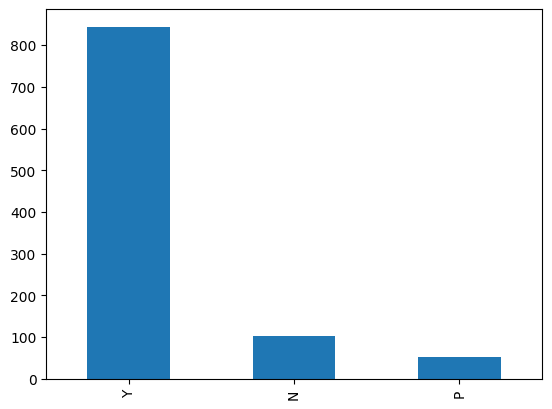

In [7]:
df_train['CLASS'].value_counts().plot(kind='bar')

In [8]:
def dynamic_label_encode(df):
    encoded_df = df.copy()
    label_encoders = {}

    for column in df.select_dtypes(include=['object']).columns:
        le = preprocessing.LabelEncoder()
        encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return encoded_df, label_encoders

encoded_df, label_encoders = dynamic_label_encode(df_train)

In [9]:
encoded_df

ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  CLASS  
0    24.0      0  
1    23.0      0  
2    24.0      0  
3    24.0      0  
4    21.0      0  
..    ...    ...  
995  30.0      2  
996  37.2      2  
997  27.4      2  
998  40.5      2  
999  33.0      2  

[1000 rows x 14 columns]

In [10]:
b=encoded_df
b.to_csv("preprocess.csv")
encoded_df

ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  CLASS  
0    24.0      0  
1    23.0      0  
2    24.0      0  
3    24.0      0  
4    21.0      0  
..    ...    ...  
995  30.0      2  
996  37.2      2  
997  27.4      2  
998  40.5      2  
999  33.0      2  

[1000 rows x 14 columns]

In [13]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int32  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int32  
dtypes: float64(8), int32(2), int64(4)
memory usage: 101.7 KB


In [12]:
X=encoded_df.drop(["CLASS",'ID','No_Pation'], axis=1)
Y=encoded_df["CLASS"]
print(X.shape)
print(Y.shape)

(1000, 11)
(1000,)


In [12]:
# sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25)

In [13]:
print(X_train.shape)
print(X_test.shape)

(750, 11)
(250, 11)


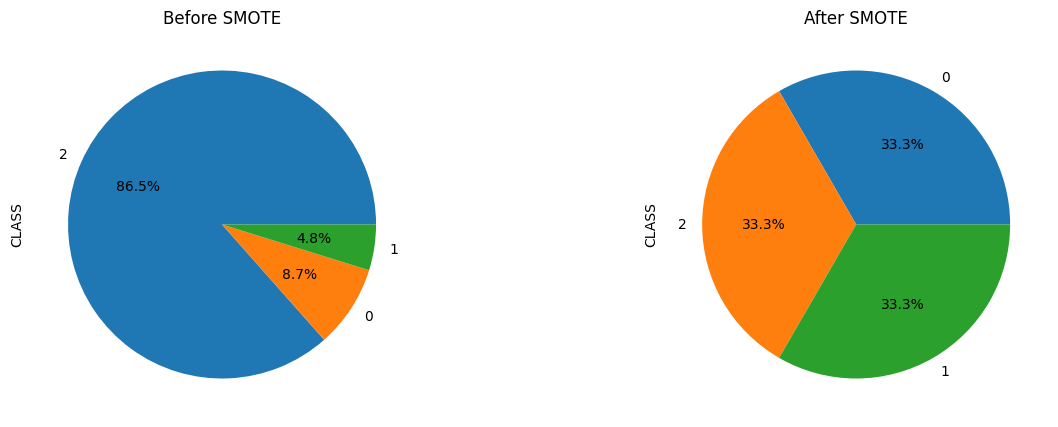

In [14]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
smote = SMOTE()

X_train_new, y_train_new = smote.fit_resample(X_train, y_train)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.pie(autopct='%.1f%%', ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

ax2.set_title('After SMOTE')
pd.Series(y_train_new).value_counts().plot.pie(autopct='%.1f%%', ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

<AxesSubplot:>

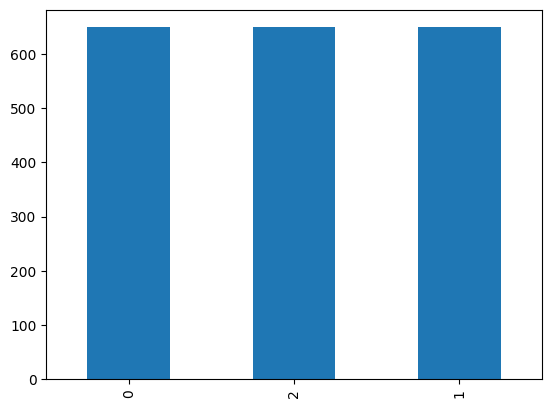

In [15]:
y_train_new.value_counts().plot(kind='bar')

# LogisticRegression

In [16]:
lr =  LogisticRegression()
lr.fit(X_train_new, y_train_new)
y_pred1=lr.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy Logistic Regression:",metrics.accuracy_score(y_test, y_pred1))

# actual values
actual = y_test
# predicted values
predicted =y_pred1

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[2,0,1])
print('Confusion matrix : \n',matrixresult)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[2,0,1])
print('Classification report Logistic Regression : \n',matrix)

Accuracy Logistic Regression: 0.74
Confusion matrix : 
 [[146  19  30]
 [  2  26  10]
 [  3   1  13]]
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           2       0.97      0.75      0.84       195
           0       0.57      0.68      0.62        38
           1       0.25      0.76      0.37        17

    accuracy                           0.74       250
   macro avg       0.59      0.73      0.61       250
weighted avg       0.86      0.74      0.78       250



C:\Users\yashs\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Save the trained model to a file using joblib
model_filename1 = "models/Logistic_Regression_Classify_model.joblib"
joblib.dump(lr, model_filename1)
print(f"Model saved as {model_filename1}")

Model saved as models/Logistic_Regression_Classify_model.joblib


# KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train_new, y_train_new)  
y_pred2=classifier.predict(X_test)

print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred2))

# actual values
actual = y_test
# predicted values
predicted =y_pred2

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[2,0,1])
print('Confusion matrix : \n',matrixresult)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[2,0,1])
print('Classification KNeighborsClassifier : \n',matrix)

Accuracy KNN: 0.864
Confusion matrix : 
 [[181   8   6]
 [ 10  23   5]
 [  2   3  12]]
Classification KNeighborsClassifier : 
               precision    recall  f1-score   support

           2       0.94      0.93      0.93       195
           0       0.68      0.61      0.64        38
           1       0.52      0.71      0.60        17

    accuracy                           0.86       250
   macro avg       0.71      0.75      0.72       250
weighted avg       0.87      0.86      0.87       250



In [19]:
# Save the trained model to a file using joblib
model_filename2 = "models/KNeighbors_Classifier_Classify_model.joblib"
joblib.dump(classifier, model_filename2)
print(f"Model saved as {model_filename2}")

Model saved as models/KNeighbors_Classifier_Classify_model.joblib


# DecisionTreeClassifier

In [20]:
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Fit the model to your training data
clf.fit(X_train_new, y_train_new)
y_pred3 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("DecisionTreeClassifier  :",metrics.accuracy_score(y_test, y_pred3))

# actual values
actual = y_test
# predicted values
predicted =y_pred3

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[2,0,1])
print('Confusion matrix : \n',matrixresult)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[2,0,1])
print('Classification DecisionTreeClassifier : \n',matrix)

DecisionTreeClassifier  : 0.988
Confusion matrix : 
 [[195   0   0]
 [  2  36   0]
 [  1   0  16]]
Classification DecisionTreeClassifier : 
               precision    recall  f1-score   support

           2       0.98      1.00      0.99       195
           0       1.00      0.95      0.97        38
           1       1.00      0.94      0.97        17

    accuracy                           0.99       250
   macro avg       0.99      0.96      0.98       250
weighted avg       0.99      0.99      0.99       250



In [21]:
# Save the trained model to a file using joblib
model_filename3 = "models/DecisionTree_Classifier_Classify_model.joblib"
joblib.dump(clf, model_filename3)
print(f"Model saved as {model_filename3}")

Model saved as models/DecisionTree_Classifier_Classify_model.joblib


# SVC linear

In [22]:
model1 = SVC(kernel='linear')  # You can choose different kernel functions like 'linear', 'rbf', etc.
# Train the model on the training data
model1.fit(X_train_new, y_train_new)
# Make predictions on the test data
y_pred4 = model1.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("SVC:",metrics.accuracy_score(y_test, y_pred4))

# actual values
actual = y_test
# predicted values
predicted =y_pred4

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[2,0,1])
print('Confusion matrix : \n',matrixresult)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[2,0,1])
print('Classification SVC : \n',matrix)

SVC: 0.928
Confusion matrix : 
 [[181   6   8]
 [  0  35   3]
 [  0   1  16]]
Classification SVC : 
               precision    recall  f1-score   support

           2       1.00      0.93      0.96       195
           0       0.83      0.92      0.88        38
           1       0.59      0.94      0.73        17

    accuracy                           0.93       250
   macro avg       0.81      0.93      0.86       250
weighted avg       0.95      0.93      0.93       250



In [23]:
# Save the trained model to a file using joblib
model_filename4 = "models/SVC_linear_Classify_model.joblib"
joblib.dump(model1, model_filename4)
print(f"Model saved as {model_filename4}")

Model saved as models/SVC_linear_Classify_model.joblib


# SVC rbf

In [24]:
model11 = SVC(kernel='rbf')  # You can choose different kernel functions like 'linear', 'rbf', etc.
# Train the model on the training data
model11.fit(X_train_new, y_train_new)
# Make predictions on the test data
y_pred5 = model11.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("SVC:",metrics.accuracy_score(y_test, y_pred4))

# actual values
actual = y_test
# predicted values
predicted =y_pred5

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[2,0,1])
print('Confusion matrix : \n',matrixresult)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[2,0,1])
print('Classification SVC : \n',matrix)

SVC: 0.928
Confusion matrix : 
 [[175   7  13]
 [  2  31   5]
 [  0   5  12]]
Classification SVC : 
               precision    recall  f1-score   support

           2       0.99      0.90      0.94       195
           0       0.72      0.82      0.77        38
           1       0.40      0.71      0.51        17

    accuracy                           0.87       250
   macro avg       0.70      0.81      0.74       250
weighted avg       0.91      0.87      0.88       250



In [25]:
# Save the trained model to a file using joblib
model_filename5 = "models/SVC_rbf_Classify_model.joblib"
joblib.dump(model11, model_filename5)
print(f"Model saved as {model_filename5}")

Model saved as models/SVC_rbf_Classify_model.joblib


# RandomForestClassifier

In [26]:
# Create an instance of the DecisionTreeClassifier
random1 = RandomForestClassifier()
# Fit the model to your training data
random1.fit(X_train_new, y_train_new)# Make predictions on the test data
y_pred6 = random1.predict(X_test)

# actual values
actual = y_test
# predicted values
predicted =y_pred6

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[2,0,1])
print('Confusion matrix : \n',matrixresult)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[2,0,1])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[194   1   0]
 [  1  37   0]
 [  1   0  16]]
Classification SVC : 
               precision    recall  f1-score   support

           2       0.99      0.99      0.99       195
           0       0.97      0.97      0.97        38
           1       1.00      0.94      0.97        17

    accuracy                           0.99       250
   macro avg       0.99      0.97      0.98       250
weighted avg       0.99      0.99      0.99       250



In [27]:
# Save the trained model to a file using joblib
model_filename6 = "models/RandomForestClassifier_Classify_model.joblib"
joblib.dump(random1, model_filename6)
print(f"Model saved as {model_filename6}")

Model saved as models/RandomForestClassifier_Classify_model.joblib


In [31]:
actual[:20].values

array([0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2])

In [33]:
(y_pred6[:20]).tolist()

[0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2]

In [ ]:
# RandomForestClassifier,DecisionTreeClassifier